<a href="https://colab.research.google.com/github/jimena-mr/ML-2/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: EGG of genetic predisposition to alcoholism

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### Datos de testeo

In [ ]:
import h5py

with h5py.File('/content/drive/Shareddrives/ML-Proyecto2/test.h5', 'r') as hdf:
  ls = list(hdf.keys())
  print("List of datasets: ", ls)

  data = hdf.get('x')
  df_test = np.array(data)

List of datasets:  ['x']


In [ ]:
df_test = df_test.reshape(df_test.shape[0],-1)
df_test = pd.DataFrame(df_test)
df_test

,0,1,2,3,4,5,6,7,8,9,...,18520,18521,18522,18523,18524,18525,18526,18527,18528,18529
0,0.029938,0.061432,0.072388,0.081329,0.078033,0.089691,0.071564,0.072205,0.062988,0.057098,...,-0.000580,0.001617,0.003540,0.003662,0.002411,0.003143,0.002594,0.002045,0.002594,0.000549
1,0.000275,0.001160,0.001556,0.001740,0.002380,0.003693,0.004883,0.005310,0.005676,0.005310,...,0.013000,0.009399,0.005981,0.001801,-0.002045,-0.006378,-0.010986,-0.015106,-0.019196,-0.022736
2,-0.002899,-0.003510,0.000458,0.002991,0.005920,0.007355,0.008728,0.008698,0.007507,0.005341,...,-0.014679,-0.019745,-0.022583,-0.023346,-0.020325,-0.014557,-0.006927,0.001343,0.008972,0.015472
3,0.008636,0.018158,0.015717,0.015991,0.015442,0.015564,0.014679,0.014923,0.013916,0.014008,...,0.007874,0.006989,0.006531,0.006012,0.005066,0.005646,0.004944,0.005127,0.003754,0.003174
4,-0.011475,-0.022217,-0.017456,-0.018890,-0.019714,-0.021301,-0.025055,-0.033569,-0.039215,-0.038483,...,0.007263,0.008270,0.010071,0.012146,0.014221,0.015442,0.015778,0.015320,0.015198,0.015656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.051788,-0.099670,-0.074982,-0.069702,-0.053253,-0.044342,-0.030121,-0.018738,-0.006195,0.003540,...,-0.348297,-0.365540,-0.372803,-0.374970,-0.369476,-0.356537,-0.339111,-0.316193,-0.290375,-0.264862
201,-0.034637,-0.058685,-0.029419,-0.077911,-0.086914,-0.061798,-0.052765,-0.051056,-0.067871,-0.053589,...,-0.002533,-0.001892,-0.000488,0.001831,0.005249,0.008545,0.011353,0.014832,0.017334,0.019470
202,-0.006989,-0.013123,-0.010986,-0.012695,-0.012299,-0.011810,-0.012512,-0.010437,-0.009918,-0.009796,...,-0.003296,-0.003693,-0.001709,-0.001526,0.000275,-0.000366,0.001343,0.002380,0.001709,0.002106
203,0.022736,0.047821,0.042450,0.042908,0.037659,0.035675,0.031708,0.029572,0.026733,0.025513,...,-0.013062,-0.020386,-0.028198,-0.034363,-0.038910,-0.042328,-0.044525,-0.046478,-0.046570,-0.049988


In [ ]:
df_test.shape

(205, 18530)

### Datos de entrenamiento

In [ ]:
import h5py

with h5py.File('/content/drive/Shareddrives/ML-Proyecto2/train.h5', 'r') as hdf:
  ls = list(hdf.keys())
  print("List of datasets: ", ls)
  data = hdf.get('x')
  X = np.array(data)
  data1 = hdf.get('y')
  y = np.array(data1)


List of datasets:  ['x', 'y']


In [ ]:
# Número de variables: 204 (canales de EEG).
# Número de muestras por variable: 18530 (puntos de tiempo).
#Dimensión redundante: La segunda dimensión (de tamaño 1) puede ser ignorada

X = X.reshape(X.shape[0],-1)
print(X.shape)
print(y.shape)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

(204, 18530)
(204,)


In [ ]:
X.isna().sum().sum() # verificando valores faltantes en X

0

# Extracción de características

In [ ]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 9.6 MB/s eta 0:00:00


## Extracción de características datos de entrenamiento

In [ ]:
num_features = X.shape[1]

feature_columns = [f"feature_{i}" for i in range(1, num_features + 1)]
X.columns = feature_columns

id_column = list(range(1, X.shape[0] + 1))
X['id'] = id_column


time_column =range(0, len(X))
X['time'] = time_column
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_18523,feature_18524,feature_18525,feature_18526,feature_18527,feature_18528,feature_18529,feature_18530,id,time
0,-0.005859,-0.011414,-0.010773,-0.010559,-0.008850,-0.008636,-0.009094,-0.008850,-0.009369,-0.009888,...,0.002075,-0.003174,-0.007843,-0.012573,-0.017670,-0.019897,-0.021637,-0.018860,1,0
1,0.002380,0.005127,0.005737,0.007263,0.008575,0.010742,0.012970,0.017212,0.022003,0.027954,...,0.006683,0.006012,0.003601,0.000427,-0.001984,-0.003998,-0.005981,-0.007660,2,1
2,0.058075,0.122040,0.108307,0.113769,0.105316,0.103912,0.094849,0.091187,0.080170,0.074432,...,-0.005402,-0.007690,-0.006592,-0.007904,-0.009674,-0.013153,-0.014130,-0.018250,3,2
3,-0.007385,-0.011932,-0.004700,-0.003143,0.005493,0.006744,0.012085,0.012909,0.018097,0.021606,...,-0.010956,-0.013916,-0.017944,-0.019867,-0.025604,-0.027161,-0.030273,-0.039368,4,3
4,-0.000458,-0.001099,0.003723,0.002930,0.004059,0.003906,0.003265,0.002777,0.000488,-0.001221,...,0.041901,0.040710,0.038727,0.025818,0.019470,0.010010,0.004242,0.003235,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.008179,0.015106,0.013245,0.014008,0.011841,0.011414,0.009430,0.009125,0.007874,0.008423,...,0.021271,0.027039,0.025238,0.028961,0.026733,0.027222,0.025818,0.018951,200,199
200,0.007660,0.011230,0.004974,0.003845,-0.005768,-0.007965,-0.012512,-0.008972,-0.006714,-0.001556,...,0.022949,0.024841,0.027344,0.026855,0.026398,0.027710,0.023987,0.029541,201,200
201,0.015167,0.031799,0.026978,0.026093,0.023041,0.023499,0.022064,0.019257,0.013580,0.008301,...,-0.010834,-0.009247,-0.007843,-0.005920,-0.003723,-0.002716,-0.000824,0.000305,202,201
202,0.002533,0.005219,0.003571,0.003815,0.002502,0.002441,0.001862,0.001251,0.000549,0.000061,...,-0.002838,-0.003662,-0.003540,-0.003632,-0.003784,-0.003693,-0.003357,-0.003479,203,202


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Columns: 18532 entries, feature_1 to time
dtypes: float64(18530), int64(2)
memory usage: 28.8 MB


In [ ]:
# YA NO CORRER !!
import dask.dataframe as dd
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters

ddf = dd.from_pandas(X, npartitions=10)

# Función para extraer características con Dask
def dask_extract_features(df):
  features_df = extract_features(df, column_id="id", column_sort="time", default_fc_parameters=MinimalFCParameters())
  features_df = features_df.rename_axis("id").reset_index(drop=False)
  return features_df


extracted_features = ddf.map_partitions(dask_extract_features).compute()

Se han truncado las últimas 5000 líneas del flujo de salida.
Feature Extraction: 100%|██████████| 370600/370600 [07:00<00:00, 881.90it/s]

Feature Extraction:  88%|████████▊ | 325621/370600 [06:12<04:02, 185.56it/s]WARNING:tsfresh.feature_extraction.settings:Dependency not available for matrix_profile, this feature will be disabled!

Feature Extraction: 100%|██████████| 370600/370600 [07:14<00:00, 853.51it/s]

Feature Extraction:  89%|████████▊ | 328840/370600 [06:27<00:21, 1912.98it/s]

In [ ]:
extracted_features.head()

,feature_1__sum_values,feature_1__median,feature_1__mean,feature_1__length,feature_1__standard_deviation,feature_1__variance,feature_1__root_mean_square,feature_1__maximum,feature_1__absolute_maximum,feature_1__minimum,...,feature_18530__sum_values,feature_18530__median,feature_18530__mean,feature_18530__length,feature_18530__standard_deviation,feature_18530__variance,feature_18530__root_mean_square,feature_18530__maximum,feature_18530__absolute_maximum,feature_18530__minimum
id,,,,,,,,,,,,,,,,,,,,,
1,-0.005859,-0.005859,-0.005859,1.0,0.0,0.0,0.005859,-0.005859,0.005859,-0.005859,...,-0.018860,-0.018860,-0.018860,1.0,0.0,0.0,0.018860,-0.018860,0.018860,-0.018860
2,0.002380,0.002380,0.002380,1.0,0.0,0.0,0.002380,0.002380,0.002380,0.002380,...,-0.007660,-0.007660,-0.007660,1.0,0.0,0.0,0.007660,-0.007660,0.007660,-0.007660
3,0.058075,0.058075,0.058075,1.0,0.0,0.0,0.058075,0.058075,0.058075,0.058075,...,-0.018250,-0.018250,-0.018250,1.0,0.0,0.0,0.018250,-0.018250,0.018250,-0.018250
4,-0.007385,-0.007385,-0.007385,1.0,0.0,0.0,0.007385,-0.007385,0.007385,-0.007385,...,-0.039368,-0.039368,-0.039368,1.0,0.0,0.0,0.039368,-0.039368,0.039368,-0.039368
5,-0.000458,-0.000458,-0.000458,1.0,0.0,0.0,0.000458,-0.000458,0.000458,-0.000458,...,0.003235,0.003235,0.003235,1.0,0.0,0.0,0.003235,0.003235,0.003235,0.003235


In [ ]:
extracted_features.to_csv('extracted_features.csv', index=False)

## Extracción de características datos de testeo

In [ ]:
df_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_18521,feature_18522,feature_18523,feature_18524,feature_18525,feature_18526,feature_18527,feature_18528,feature_18529,feature_18530
0,0.029938,0.061432,0.072388,0.081329,0.078033,0.089691,0.071564,0.072205,0.062988,0.057098,...,-0.000580,0.001617,0.003540,0.003662,0.002411,0.003143,0.002594,0.002045,0.002594,0.000549
1,0.000275,0.001160,0.001556,0.001740,0.002380,0.003693,0.004883,0.005310,0.005676,0.005310,...,0.013000,0.009399,0.005981,0.001801,-0.002045,-0.006378,-0.010986,-0.015106,-0.019196,-0.022736
2,-0.002899,-0.003510,0.000458,0.002991,0.005920,0.007355,0.008728,0.008698,0.007507,0.005341,...,-0.014679,-0.019745,-0.022583,-0.023346,-0.020325,-0.014557,-0.006927,0.001343,0.008972,0.015472
3,0.008636,0.018158,0.015717,0.015991,0.015442,0.015564,0.014679,0.014923,0.013916,0.014008,...,0.007874,0.006989,0.006531,0.006012,0.005066,0.005646,0.004944,0.005127,0.003754,0.003174
4,-0.011475,-0.022217,-0.017456,-0.018890,-0.019714,-0.021301,-0.025055,-0.033569,-0.039215,-0.038483,...,0.007263,0.008270,0.010071,0.012146,0.014221,0.015442,0.015778,0.015320,0.015198,0.015656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.051788,-0.099670,-0.074982,-0.069702,-0.053253,-0.044342,-0.030121,-0.018738,-0.006195,0.003540,...,-0.348297,-0.365540,-0.372803,-0.374970,-0.369476,-0.356537,-0.339111,-0.316193,-0.290375,-0.264862
201,-0.034637,-0.058685,-0.029419,-0.077911,-0.086914,-0.061798,-0.052765,-0.051056,-0.067871,-0.053589,...,-0.002533,-0.001892,-0.000488,0.001831,0.005249,0.008545,0.011353,0.014832,0.017334,0.019470
202,-0.006989,-0.013123,-0.010986,-0.012695,-0.012299,-0.011810,-0.012512,-0.010437,-0.009918,-0.009796,...,-0.003296,-0.003693,-0.001709,-0.001526,0.000275,-0.000366,0.001343,0.002380,0.001709,0.002106
203,0.022736,0.047821,0.042450,0.042908,0.037659,0.035675,0.031708,0.029572,0.026733,0.025513,...,-0.013062,-0.020386,-0.028198,-0.034363,-0.038910,-0.042328,-0.044525,-0.046478,-0.046570,-0.049988


In [ ]:
num_features = df_test.shape[1]

feature_columns = [f"feature_{i}" for i in range(1, num_features + 1)]
df_test.columns = feature_columns

id_column = list(range(1, df_test.shape[0] + 1))
df_test['id'] = id_column


time_column =range(0, len(df_test))
df_test['time'] = time_column
df_test.head(3)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_18523,feature_18524,feature_18525,feature_18526,feature_18527,feature_18528,feature_18529,feature_18530,id,time
0,0.029938,0.061432,0.072388,0.081329,0.078033,0.089691,0.071564,0.072205,0.062988,0.057098,...,0.003540,0.003662,0.002411,0.003143,0.002594,0.002045,0.002594,0.000549,1,0
1,0.000275,0.001160,0.001556,0.001740,0.002380,0.003693,0.004883,0.005310,0.005676,0.005310,...,0.005981,0.001801,-0.002045,-0.006378,-0.010986,-0.015106,-0.019196,-0.022736,2,1
2,-0.002899,-0.003510,0.000458,0.002991,0.005920,0.007355,0.008728,0.008698,0.007507,0.005341,...,-0.022583,-0.023346,-0.020325,-0.014557,-0.006927,0.001343,0.008972,0.015472,3,2


In [ ]:
import dask.dataframe as dd
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters

ddf = dd.from_pandas(df_test, npartitions=10)

# Función para extraer características con Dask
def dask_extract_features(df):
  features_df = extract_features(df, column_id="id", column_sort="time", default_fc_parameters=MinimalFCParameters())
  features_df = features_df.rename_axis("id").reset_index(drop=False)
  return features_df


extracted_features_test = ddf.map_partitions(dask_extract_features).compute()

Se han truncado las últimas 5000 líneas del flujo de salida.
Feature Extraction: 100%|██████████| 370600/370600 [06:28<00:00, 952.85it/s]

Feature Extraction:  91%|█████████ | 336448/370600 [06:00<00:31, 1079.30it/s]

In [ ]:
extracted_features_test

,id,feature_1__sum_values,feature_1__median,feature_1__mean,feature_1__length,feature_1__standard_deviation,feature_1__variance,feature_1__root_mean_square,feature_1__maximum,feature_1__absolute_maximum,...,feature_18530__sum_values,feature_18530__median,feature_18530__mean,feature_18530__length,feature_18530__standard_deviation,feature_18530__variance,feature_18530__root_mean_square,feature_18530__maximum,feature_18530__absolute_maximum,feature_18530__minimum
0,1,0.029938,0.029938,0.029938,1.0,0.0,0.0,0.029938,0.029938,0.029938,...,0.000549,0.000549,0.000549,1.0,0.0,0.0,0.000549,0.000549,0.000549,0.000549
1,2,0.000275,0.000275,0.000275,1.0,0.0,0.0,0.000275,0.000275,0.000275,...,-0.022736,-0.022736,-0.022736,1.0,0.0,0.0,0.022736,-0.022736,0.022736,-0.022736
2,3,-0.002899,-0.002899,-0.002899,1.0,0.0,0.0,0.002899,-0.002899,0.002899,...,0.015472,0.015472,0.015472,1.0,0.0,0.0,0.015472,0.015472,0.015472,0.015472
3,4,0.008636,0.008636,0.008636,1.0,0.0,0.0,0.008636,0.008636,0.008636,...,0.003174,0.003174,0.003174,1.0,0.0,0.0,0.003174,0.003174,0.003174,0.003174
4,5,-0.011475,-0.011475,-0.011475,1.0,0.0,0.0,0.011475,-0.011475,0.011475,...,0.015656,0.015656,0.015656,1.0,0.0,0.0,0.015656,0.015656,0.015656,0.015656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,201,-0.051788,-0.051788,-0.051788,1.0,0.0,0.0,0.051788,-0.051788,0.051788,...,-0.264862,-0.264862,-0.264862,1.0,0.0,0.0,0.264862,-0.264862,0.264862,-0.264862
16,202,-0.034637,-0.034637,-0.034637,1.0,0.0,0.0,0.034637,-0.034637,0.034637,...,0.019470,0.019470,0.019470,1.0,0.0,0.0,0.019470,0.019470,0.019470,0.019470
17,203,-0.006989,-0.006989,-0.006989,1.0,0.0,0.0,0.006989,-0.006989,0.006989,...,0.002106,0.002106,0.002106,1.0,0.0,0.0,0.002106,0.002106,0.002106,0.002106
18,204,0.022736,0.022736,0.022736,1.0,0.0,0.0,0.022736,0.022736,0.022736,...,-0.049988,-0.049988,-0.049988,1.0,0.0,0.0,0.049988,-0.049988,0.049988,-0.049988


In [ ]:
extracted_features_test.to_csv('extracted_features_test.csv', index=False)

# Selección de características

## Datos de entrenamiento

In [17]:
extracted_features = pd.read_csv('/content/drive/Shareddrives/ML-Proyecto2/extracted_features.csv')
extracted_features.head(3)

,id,feature_1__sum_values,feature_1__median,feature_1__mean,feature_1__length,feature_1__standard_deviation,feature_1__variance,feature_1__root_mean_square,feature_1__maximum,feature_1__absolute_maximum,...,feature_18530__sum_values,feature_18530__median,feature_18530__mean,feature_18530__length,feature_18530__standard_deviation,feature_18530__variance,feature_18530__root_mean_square,feature_18530__maximum,feature_18530__absolute_maximum,feature_18530__minimum
0,1,-0.005859,-0.005859,-0.005859,1.0,0.0,0.0,0.005859,-0.005859,0.005859,...,-0.01886,-0.01886,-0.01886,1.0,0.0,0.0,0.01886,-0.01886,0.01886,-0.01886
1,2,0.002380,0.002380,0.002380,1.0,0.0,0.0,0.002380,0.002380,0.002380,...,-0.00766,-0.00766,-0.00766,1.0,0.0,0.0,0.00766,-0.00766,0.00766,-0.00766
2,3,0.058075,0.058075,0.058075,1.0,0.0,0.0,0.058075,0.058075,0.058075,...,-0.01825,-0.01825,-0.01825,1.0,0.0,0.0,0.01825,-0.01825,0.01825,-0.01825


In [18]:
y_series = y.squeeze()
y_series

0      0
1      1
2      0
3      0
4      0
      ..
199    0
200    0
201    0
202    0
203    1
Name: 0, Length: 204, dtype: int64

In [52]:
# PROBANDO
from sklearn.decomposition import PCA

componentes = 70
pca = PCA(n_components=componentes) # queda mejor < 120 comp
x_ss = pca.fit_transform(extracted_features)

x_ss_df = pd.DataFrame(x_ss, columns=[f"PCA_{i+1}" for i in range(componentes)])
x_ss_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_61,PCA_62,PCA_63,PCA_64,PCA_65,PCA_66,PCA_67,PCA_68,PCA_69,PCA_70
0,-101.462689,1.787465,-1.687271,-1.694142,0.729810,0.346079,-0.395758,-0.724553,-0.490612,-0.160199,...,1.028287,-1.391439,2.877644,-0.164474,2.036465,-2.276999,5.909217,-1.295670,3.809948,-2.000437
1,-100.481209,1.432251,-1.627435,-1.534873,-0.081394,-0.650521,-0.231019,-0.379281,0.591194,0.502997,...,-0.007947,-0.201745,-2.978228,1.934350,2.371050,6.964161,-1.299271,4.086084,2.965282,3.311410
2,-99.490813,-0.023084,-1.606323,-1.650193,0.095505,-0.258686,-0.383726,-1.278145,-1.034705,-0.239275,...,0.408265,0.512081,-0.916629,-0.316136,-0.065830,-0.109957,0.121194,-0.963141,-0.921475,-0.134526
3,-98.494324,-0.695814,-2.014629,-2.207778,-0.349073,-0.043467,-0.365360,-1.000694,-0.240500,-0.654458,...,0.178259,0.032957,-0.275566,0.037480,0.019785,-0.072235,-0.055106,-0.042765,-0.325478,0.027825
4,-97.477218,0.692682,-1.955588,-0.920584,0.385163,-0.256023,-0.574732,-0.962607,0.941882,-0.595139,...,1.500270,1.090272,-1.332564,-3.232448,-0.524214,-1.251801,0.974644,-0.157255,2.014426,-2.735032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,97.414054,-3.963105,0.541389,0.204705,-1.614808,-0.078454,-0.211229,0.291897,-0.887651,-0.430805,...,0.255703,-0.025605,0.530816,0.445086,-0.224623,-0.072941,0.326625,0.104358,-0.394958,0.262447
200,98.440133,-3.799633,0.433259,0.359997,-1.379408,-0.019659,-0.249847,0.386795,0.279076,0.063854,...,0.042437,-0.512517,-0.839044,-0.631941,0.448991,2.267883,-0.468501,1.942164,0.798141,-1.856416
201,99.429066,-3.587449,1.230080,0.973175,-1.009026,-0.192866,-0.013547,0.630346,0.144360,0.023110,...,0.327072,2.020289,0.098984,-0.700211,-1.441527,0.797403,1.864861,1.116662,1.463465,0.214712
202,100.388205,-5.395777,0.093526,-0.269855,-2.167085,0.019072,-0.560208,-0.070864,-0.899892,-0.465551,...,-0.014250,-0.136918,0.251258,-0.133268,-0.100438,0.124257,-0.088829,-0.153525,-0.301521,0.066215


## Datos de testeo

In [16]:
extracted_features_test = pd.read_csv('/content/drive/Shareddrives/ML-Proyecto2/extracted_features_test.csv')
extracted_features_test.head(3)

,id,feature_1__sum_values,feature_1__median,feature_1__mean,feature_1__length,feature_1__standard_deviation,feature_1__variance,feature_1__root_mean_square,feature_1__maximum,feature_1__absolute_maximum,...,feature_18530__sum_values,feature_18530__median,feature_18530__mean,feature_18530__length,feature_18530__standard_deviation,feature_18530__variance,feature_18530__root_mean_square,feature_18530__maximum,feature_18530__absolute_maximum,feature_18530__minimum
0,1,0.029938,0.029938,0.029938,1.0,0.0,0.0,0.029938,0.029938,0.029938,...,0.000549,0.000549,0.000549,1.0,0.0,0.0,0.000549,0.000549,0.000549,0.000549
1,2,0.000275,0.000275,0.000275,1.0,0.0,0.0,0.000275,0.000275,0.000275,...,-0.022736,-0.022736,-0.022736,1.0,0.0,0.0,0.022736,-0.022736,0.022736,-0.022736
2,3,-0.002899,-0.002899,-0.002899,1.0,0.0,0.0,0.002899,-0.002899,0.002899,...,0.015472,0.015472,0.015472,1.0,0.0,0.0,0.015472,0.015472,0.015472,0.015472


In [97]:
from sklearn.decomposition import PCA

componentes = 70
pca = PCA(n_components=componentes)
selected_features_test = pca.fit_transform(extracted_features_test)

selected_features_test_df = pd.DataFrame(selected_features_test, columns=[f"PCA_{i+1}" for i in range(componentes)])
selected_features_test_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_61,PCA_62,PCA_63,PCA_64,PCA_65,PCA_66,PCA_67,PCA_68,PCA_69,PCA_70
0,102.124540,2.060925,0.320148,4.688033,4.456475,1.444471,-0.569013,-0.311965,3.363409,2.638442,...,-0.043067,0.187668,-0.061268,-0.140390,-0.124043,-0.240625,-0.081190,0.000573,-0.124409,-0.046262
1,100.964150,-1.827665,-2.076674,-2.284301,-0.055470,0.330050,-0.524923,-1.100618,-1.029740,-0.380579,...,0.017074,-0.386672,-0.387586,0.236092,0.056005,0.174684,-0.033609,-0.163135,-0.157506,0.113413
2,99.979372,-1.131331,-1.782841,-1.697284,0.058439,0.382535,-0.303907,-0.518031,-0.682124,-0.412116,...,-0.222656,-0.561206,-0.130776,0.124256,-0.010841,0.018967,-0.020756,0.315489,0.046068,0.125891
3,98.977850,-1.424861,-1.570659,-1.817456,0.256244,0.279472,0.238132,-0.929698,-0.950805,-0.257861,...,0.170867,-0.260779,0.216607,0.163407,-0.024271,0.420666,0.100432,0.028178,-0.041406,-0.103139
4,97.997339,0.003843,-1.027876,-0.927478,0.990585,0.937501,-0.058681,-0.706173,0.229609,-0.388228,...,-0.777581,-1.628863,-0.532334,0.783179,1.096679,1.074372,-2.325169,2.766405,-2.900334,-1.750067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-97.987372,-1.411292,0.857018,-0.506943,-1.074665,-0.636469,-0.431590,1.006995,-0.190417,0.189787,...,-1.518346,-0.084991,2.000882,-0.329778,-2.051558,-1.921177,2.764388,3.856304,6.825043,1.085408
201,-98.987911,-0.699110,0.815355,-0.202320,-1.187586,-1.152001,0.231808,0.399237,0.561878,0.435868,...,0.998631,0.293560,-0.783937,-1.524968,-0.599843,0.187706,1.653879,-1.206360,0.108932,-0.736447
202,-99.974605,-2.792752,-0.253321,-1.788015,-1.641028,-0.643964,0.015282,0.248221,-1.069328,0.004228,...,-0.089004,-0.012597,0.065289,0.068282,0.159305,-0.253593,-0.259574,-0.136433,-0.338345,-0.366391
203,-101.479139,5.986892,0.938862,16.134580,47.765616,-19.986426,-15.169089,-10.723557,-11.705233,-6.480743,...,-0.024855,-0.117270,0.097234,0.276471,0.140685,0.061513,-0.166110,0.031793,0.137022,-0.043637


## **Escalado de datos** (train)

In [67]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

X_scaled_ss = pd.DataFrame(min_max_scaler.fit_transform(x_ss_df), columns=x_ss_df.columns)
X_scaled_ss.head(4)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_61,PCA_62,PCA_63,PCA_64,PCA_65,PCA_66,PCA_67,PCA_68,PCA_69,PCA_70
0,0.000000,0.035987,0.267134,0.075220,0.236442,0.368256,0.358995,0.187452,0.207415,0.444581,...,0.385077,0.244127,0.637957,0.320014,0.545430,0.187161,1.000000,0.257279,0.851725,0.208433
1,0.004833,0.034207,0.267450,0.077033,0.223001,0.356262,0.361073,0.193133,0.228786,0.456813,...,0.308495,0.363500,0.105470,0.521369,0.569647,1.000000,0.349635,0.899041,0.747957,0.840499
2,0.009709,0.026916,0.267562,0.075720,0.225932,0.360978,0.359147,0.178342,0.196667,0.443122,...,0.339254,0.435124,0.292936,0.305464,0.393268,0.377771,0.477792,0.296932,0.270468,0.430461
3,0.014615,0.023546,0.265401,0.069376,0.218565,0.363568,0.359378,0.182908,0.212356,0.435465,...,0.322256,0.387050,0.351229,0.339389,0.399465,0.381089,0.461886,0.406685,0.343686,0.449780


## **Escalado de datos** (test)

In [98]:
min_max_scaler = MinMaxScaler()

X_scaled_test = pd.DataFrame(min_max_scaler.fit_transform(selected_features_test_df), columns=selected_features_test_df.columns)
X_scaled_test.head(4)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_61,PCA_62,PCA_63,PCA_64,PCA_65,PCA_66,PCA_67,PCA_68,PCA_69,PCA_70
0,1.000000,0.035995,0.193669,0.221303,0.441665,0.437394,0.443572,0.377288,0.324960,0.420852,...,0.464318,0.362681,0.201177,0.368149,0.351316,0.443594,0.373184,0.395005,0.359076,0.403842
1,0.994316,0.007727,0.175017,0.090131,0.383498,0.420187,0.444328,0.363419,0.239302,0.373044,...,0.468342,0.325263,0.177763,0.400342,0.362848,0.479249,0.376846,0.379561,0.356024,0.419377
2,0.989492,0.012789,0.177303,0.101174,0.384966,0.420997,0.448116,0.373664,0.246080,0.372544,...,0.452304,0.313892,0.196189,0.390779,0.358566,0.465880,0.377835,0.424715,0.374799,0.420591
3,0.984586,0.010655,0.178954,0.098913,0.387516,0.419406,0.457407,0.366425,0.240841,0.374987,...,0.478631,0.333465,0.221115,0.394127,0.357706,0.500367,0.387160,0.397610,0.366731,0.398308


# **Modelo**

# Decision Tree

In [82]:
from collections import Counter

class TreeNode():
    def __init__(self, data, feature_idx, feature_val, prediction_probs, information_gain) -> None:
        self.data = data
        self.feature_idx = feature_idx
        self.feature_val = feature_val
        self.prediction_probs = prediction_probs
        self.information_gain = information_gain
        self.feature_importance = self.data.shape[0] * self.information_gain
        self.left = None
        self.right = None

    def node_def(self) -> str:

        if (self.left or self.right):
            return f"NODE | Information Gain = {self.information_gain} | Split IF X[{self.feature_idx}] < {self.feature_val} THEN left O/W right"
        else:
            unique_values, value_counts = np.unique(self.data[:,-1], return_counts=True)
            output = ", ".join([f"{value}->{count}" for value, count in zip(unique_values, value_counts)])
            return f"LEAF | Label Counts = {output} | Pred Probs = {self.prediction_probs}"

class DecisionTree():

    def __init__(self, max_depth=4, min_samples_leaf=1,
                 min_information_gain=0.0, numb_of_features_splitting=None,
                 amount_of_say=None) -> None:
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_information_gain = min_information_gain
        self.numb_of_features_splitting = numb_of_features_splitting
        self.amount_of_say = amount_of_say

    def _entropy(self, class_probabilities: list) -> float:
        return sum([-p * np.log2(p) for p in class_probabilities if p>0])

    def _class_probabilities(self, labels: list) -> list:
        total_count = len(labels)
        return [label_count / total_count for label_count in Counter(labels).values()]

    def _data_entropy(self, labels: list) -> float:
        return self._entropy(self._class_probabilities(labels))

    def _partition_entropy(self, subsets: list) -> float:
        total_count = sum([len(subset) for subset in subsets])
        return sum([self._data_entropy(subset) * (len(subset) / total_count) for subset in subsets])

    def _split(self, data: np.array, feature_idx: int, feature_val: float) -> tuple:

        mask_below_threshold = data[:, feature_idx] < feature_val
        group1 = data[mask_below_threshold]
        group2 = data[~mask_below_threshold]

        return group1, group2

    def _select_features_to_use(self, data: np.array) -> list:
        feature_idx = list(range(data.shape[1]-1))

        if self.numb_of_features_splitting == "sqrt":
            feature_idx_to_use = np.random.choice(feature_idx, size=int(np.sqrt(len(feature_idx))))
        elif self.numb_of_features_splitting == "log":
            feature_idx_to_use = np.random.choice(feature_idx, size=int(np.log2(len(feature_idx))))
        else:
            feature_idx_to_use = feature_idx

        return feature_idx_to_use

    def _find_best_split(self, data: np.array) -> tuple:
        min_part_entropy = 1e9
        feature_idx_to_use =  self._select_features_to_use(data)

        for idx in feature_idx_to_use:
            feature_vals = np.percentile(data[:, idx], q=np.arange(25, 100, 25))
            for feature_val in feature_vals:
                g1, g2, = self._split(data, idx, feature_val)
                part_entropy = self._partition_entropy([g1[:, -1], g2[:, -1]])
                if part_entropy < min_part_entropy:
                    min_part_entropy = part_entropy
                    min_entropy_feature_idx = idx
                    min_entropy_feature_val = feature_val
                    g1_min, g2_min = g1, g2

        return g1_min, g2_min, min_entropy_feature_idx, min_entropy_feature_val, min_part_entropy

    def _find_label_probs(self, data: np.array) -> np.array:

        labels_as_integers = data[:,-1].astype(int)
        # Calculate the total number of labels
        total_labels = len(labels_as_integers)
        # Calculate the ratios (probabilities) for each label
        label_probabilities = np.zeros(len(self.labels_in_train), dtype=float)

        # Populate the label_probabilities array based on the specific labels
        for i, label in enumerate(self.labels_in_train):
            label_index = np.where(labels_as_integers == i)[0]
            if len(label_index) > 0:
                label_probabilities[i] = len(label_index) / total_labels

        return label_probabilities

    def _create_tree(self, data: np.array, current_depth: int) -> TreeNode:

        # Check if the max depth has been reached (stopping criteria)
        if current_depth > self.max_depth:
            return None

        # Find best split
        split_1_data, split_2_data, split_feature_idx, split_feature_val, split_entropy = self._find_best_split(data)

        # Find label probs for the node
        label_probabilities = self._find_label_probs(data)

        # Calculate information gain
        node_entropy = self._entropy(label_probabilities)
        information_gain = node_entropy - split_entropy

        # Create node
        node = TreeNode(data, split_feature_idx, split_feature_val, label_probabilities, information_gain)

        # Check if the min_samples_leaf has been satisfied (stopping criteria)
        if self.min_samples_leaf > split_1_data.shape[0] or self.min_samples_leaf > split_2_data.shape[0]:
            return node
        # Check if the min_information_gain has been satisfied (stopping criteria)
        elif information_gain < self.min_information_gain:
            return node

        current_depth += 1
        node.left = self._create_tree(split_1_data, current_depth)
        node.right = self._create_tree(split_2_data, current_depth)

        return node

    def _predict_one_sample(self, X: np.array) -> np.array:
        node = self.tree

        # Finds the leaf which X belongs
        while node:
            pred_probs = node.prediction_probs
            if X[node.feature_idx] < node.feature_val:
                node = node.left
            else:
                node = node.right

        return pred_probs

    def train(self, X_train: np.array, Y_train: np.array) -> None:

        # Concat features and labels
        self.labels_in_train = np.unique(Y_train)
        train_data = np.concatenate((X_train, np.reshape(Y_train, (-1, 1))), axis=1)

        # Start creating the tree
        self.tree = self._create_tree(data=train_data, current_depth=0)

        # Calculate feature importance
        self.feature_importances = dict.fromkeys(range(X_train.shape[1]), 0)
        self._calculate_feature_importance(self.tree)
        # Normalize the feature importance values
        self.feature_importances = {k: v / total for total in (sum(self.feature_importances.values()),) for k, v in self.feature_importances.items()}

    def predict_proba(self, X_set: np.array) -> np.array:
        pred_probs = np.apply_along_axis(self._predict_one_sample, 1, X_set)

        return pred_probs

    def predict(self, X_set: np.array) -> np.array:
        pred_probs = self.predict_proba(X_set)
        preds = np.argmax(pred_probs, axis=1)

        return preds

    def _print_recursive(self, node: TreeNode, level=0) -> None:
        if node != None:
            self._print_recursive(node.left, level + 1)
            print('    ' * 4 * level + '-> ' + node.node_def())
            self._print_recursive(node.right, level + 1)

    def print_tree(self) -> None:
        self._print_recursive(node=self.tree)

    def _calculate_feature_importance(self, node):
        if node != None:
            self.feature_importances[node.feature_idx] += node.feature_importance
            self._calculate_feature_importance(node.left)
            self._calculate_feature_importance(node.right)

# Entrenamiento

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_ss, y, test_size=0.5, random_state=42)

In [85]:
DT = DecisionTree(max_depth=30,min_samples_leaf=1)
DT.train(X_train,y_train)
y_pred = DT.predict(X_test)

## Metrics

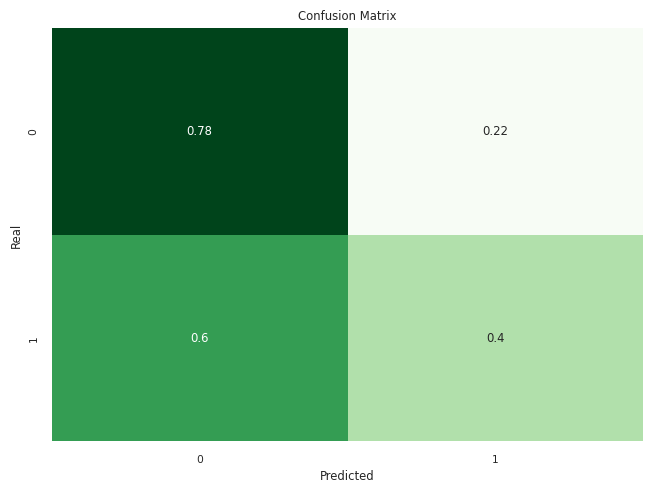

In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set(font_scale=0.7)
matrix = confusion_matrix(y_test,y_pred)
df2 = pd.DataFrame(matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])
sns.heatmap(df2, annot=True, cbar=None, cmap="Greens")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

In [87]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        77
           1       0.37      0.40      0.38        25

    accuracy                           0.69       102
   macro avg       0.59      0.59      0.59       102
weighted avg       0.69      0.69      0.69       102



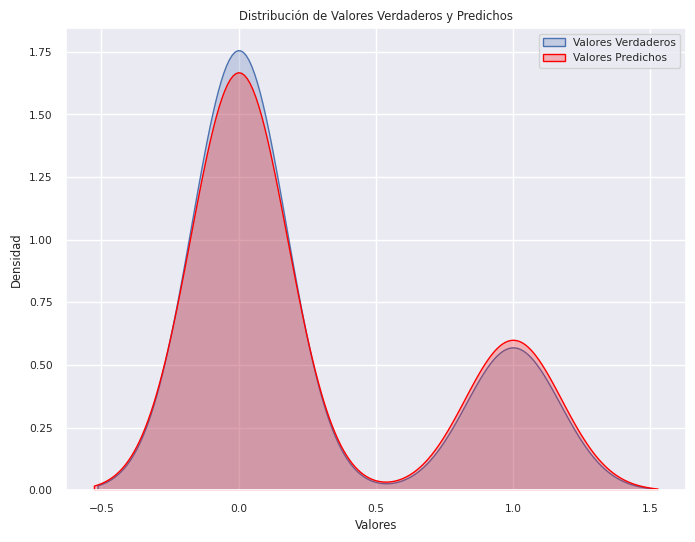

In [106]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Valores Verdaderos', color='blue', fill=True)
sns.kdeplot(y_pred, label='Valores Predichos', color='red', fill=True)
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Distribución de Valores Verdaderos y Predichos')
plt.legend()
plt.show()


In [105]:
# La curva ROC representa la tasa de verdaderos positivos (TP) en el eje y (también conocida como sensibilidad) y
# la tasa de falsos positivos (FP) en el eje x.
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.5896103896103896

## Predicción con *df_test*

In [99]:
# Usando toda la data
y_pred_test = DT.predict(X_scaled_test)

In [100]:
y_pred_test.shape

(205,)

In [101]:
result_df = pd.DataFrame({'ID': range(1, len(y_pred_test) + 1), 'result': y_pred_test})
result_df

,ID,result
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
200,201,1
201,202,1
202,203,1
203,204,0


In [102]:
result_df['result'].value_counts()

result
1    199
0      6
Name: count, dtype: int64

In [ ]:
result_df.to_csv('resultados.csv', index=False)

## Soft SVM

In [ ]:
from cvxopt import matrix, solvers

class Soft_SVM():
    def __init__(self, X, Y, C=1):
        self.X = X
        self.Y = Y
        self.C = C
        self.lam = None
        self.W = None
        self.bias = None
        self._GetLambda()
        self._Get_W_b()

    def _GetLambda(self):
        n, m = self.X.shape
        self.Y = self.Y.astype(float)
        self.X = self.X.astype(float)
        K = np.dot(self.X, self.X.T) * np.dot(self.Y, self.Y.T)  # Kernel
        P = matrix(K)
        q = matrix(-np.ones(n))
        G = matrix(np.vstack((-np.eye(n), np.eye(n))))
        h = matrix(np.hstack((np.zeros(n), np.ones(n) * self.C)))
        A = matrix(self.Y.reshape(1, -1))
        b = matrix(np.zeros(1))
        sol = solvers.qp(P, q, G, h, A, b)
        self.lam = np.array(sol['x'])

    def _Get_W_b(self):
        try:
            self.W = np.dot((self.lam * self.Y).T, self.X)
            self.bias = np.mean(self.Y - np.dot(self.X, self.W.T))
            print("W:", self.W)
            print("bias:", self.bias)
        except Exception as e:
            print("Error calculating W and bias:", e)

    def predict(self, X_test):
        if self.W is None or self.bias is None:
            print("Model not trained properly.")
            return None
        pred = np.sign(np.dot(X_test, self.W.T) + self.bias)
        return pred.astype(int)


In [ ]:
y_array = np.array(y)
y = pd.DataFrame(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_ss, y, test_size=0.5, random_state=42)

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
y_pred = Soft_SVM(X_train.values, y_train.values).predict(X_test.values)

     pcost       dcost       gap    pres   dres
 0: -7.2000e+01 -1.7400e+02  4e+02  1e+00  2e-16
 1: -5.9864e+01 -1.0561e+02  5e+01  1e-02  3e-16
 2: -7.0707e+01 -7.2591e+01  2e+00  6e-04  3e-16
 3: -7.1987e+01 -7.2006e+01  2e-02  6e-06  3e-16
 4: -7.2000e+01 -7.2000e+01  2e-04  6e-08  4e-16
 5: -7.2000e+01 -7.2000e+01  2e-06  6e-10  2e-16
Optimal solution found.
W: [[-1.17024952e-23  1.13015247e-25 -3.18845286e-24 -4.65414942e-25
  -1.85769959e-24 -3.82106291e-24 -3.45107231e-24  2.18310406e-24
   4.00932647e-24 -1.46633079e-23 -2.90608777e-24 -5.83648942e-24
  -1.86011949e-24 -8.69980616e-24 -4.16392009e-25  3.06835928e-25
  -1.85764703e-24 -1.60883117e-24 -7.78077496e-24 -1.67265542e-24]]
bias: 0.29411764705882354


Metrics

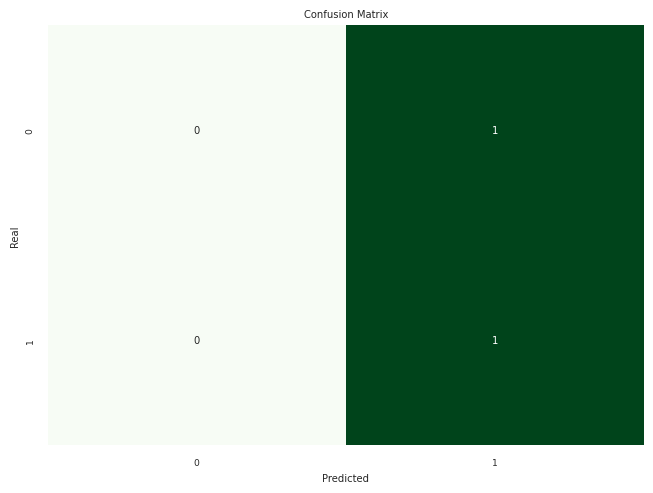

In [ ]:
from sklearn.metrics import confusion_matrix

sns.set(font_scale=0.6)
matrix = confusion_matrix(y_test,y_pred)
df2 = pd.DataFrame(matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])
sns.heatmap(df2, annot=True, cbar=None, cmap="Greens")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.25      1.00      0.39        25

    accuracy                           0.25       102
   macro avg       0.12      0.50      0.20       102
weighted avg       0.06      0.25      0.10       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
